In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats
from scipy.stats import norm, t

## Aerofit

In [2]:
df_aerofit = pd.read_csv("aerofit.csv")

In [3]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [26]:
df_aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

## gender vs. Income

In [4]:
income_male = df_aerofit[df_aerofit["Gender"]=="Male"]["Income"]
income_female = df_aerofit[df_aerofit["Gender"]=="Female"]["Income"]

In [5]:
income_male.mean()

56562.75961538462

In [6]:
income_female.mean()

49828.90789473684

<AxesSubplot:xlabel='Gender', ylabel='Income'>

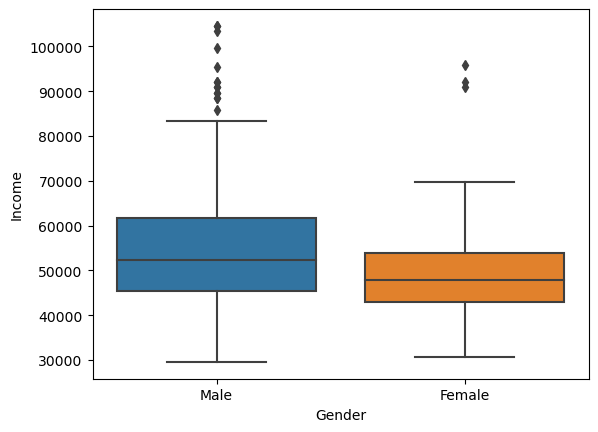

In [7]:
sns.boxplot(x='Gender', y='Income', data=df_aerofit) 

### H0: mu1=mu2
### Ha= mu1!=mu2

In [15]:
alpha=0.01

In [22]:
t_stat, p_value = ttest_ind(income_male, income_female)

In [23]:
p_value

0.006527263097214258

In [24]:
if p_value<alpha:
    print("reject H0")
else:
    print("fail to reject H0")

reject H0


In [25]:
ttest_ind_from_stats(
    income_male.mean(),
    income_male.std(),
    len(income_male),
    income_female.mean(),
    income_female.std(),
    len(income_female),
)

Ttest_indResult(statistic=2.752488637540257, pvalue=0.006527263097214258)